Check the input file for issues, so far I see the following
(1) do they list any league more than once?
(2) should I ask about more options?
(3) do they want to curl in more open leagues than they list?
Useful information provided by this file: 
(a) How many people list a given league as their first choice.
(b) How many registrations are there in total?

=======
Krista Longnecker
18 September 2019

In [1]:
%reset -f

In [2]:
import pandas as pd
import numpy as np
import random
import math
import csv
import os.path
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#New behind the scenes program exports an Excel file...
fName = 'registrants_list_on_2019-09-18.KLworking.xlsx' 
importInfo = pd.read_excel(io=fName)

In [5]:
openLeagues = ['Sunday Night', 'Monday 4PM', 'Monday Night','Tuesday 10AM', 'Tuesday 4PM',
               'Wednesday 4PM','Thursday 4PM'] #updated to match the priority list
otherLeagues = ['Men''s League', 'Ladies League' ,'Scrod League','Thursday9AMdoubles']

priorities = ['First Open League Choice','Second Open League Choice',
              'Third Open League Choice','Fourth Open League Choice',
              'Fifth Open League Choice','Sixth Open League Choice']

regInfo = importInfo.loc[:,(['First Name','Last Name','email','How many Chamionship Leagues would you like to play in?'] + otherLeagues)]

for item in openLeagues:
    regInfo[item] = np.nan

nPeople = len(regInfo.index)
for idx in range(0,nPeople):
    for idxP in enumerate(priorities):
        #remember: enumerate will allow idxP[0] is the number, while idxP[1] is the value
        getOne = importInfo.loc[idx,idxP[1]]
        if getOne != 'None':
            regInfo.loc[idx,getOne] = idxP[0] + 1  #want 1,2,3 and not python zero index

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [6]:
#if we only consider the 4 pm leagues
only4pm = ['Monday 4PM','Tuesday 4PM','Wednesday 4PM','Thursday 4PM']

In [7]:
len(regInfo)

207

Text(0, 0.5, '# of people in category')

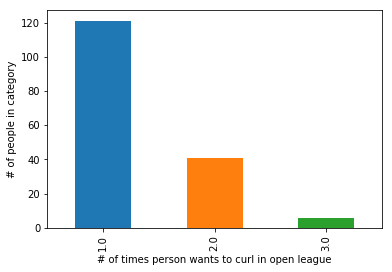

In [8]:
tData = regInfo.replace(to_replace='None', value=0)
toPlot = tData.loc[:,'How many Chamionship Leagues would you like to play in?'].value_counts()

#drop the zeros...seems crazy, but can't really index into a series easily
toPlot = toPlot[~toPlot.index.isin([0])]

toPlot.plot(kind = 'bar')
plt.xlabel('# of times person wants to curl in open league')
plt.ylabel('# of people in category')

In [9]:
toPlot

1.0    121
2.0     41
3.0      6
Name: How many Chamionship Leagues would you like to play in?, dtype: int64

In [10]:
regPlot = importInfo.loc[:,(['First Name','Last Name','email','How many Chamionship Leagues would you like to play in?'] + otherLeagues)]

for item in openLeagues:
    regPlot[item] = np.nan

nPeople = len(regPlot.index)
for idx in range(0,nPeople):
    for idxP in enumerate(priorities):
        #remember: enumerate will allow idxP[0] is the number, while idxP[1] is the value
        getOne = importInfo.loc[idx,idxP[1]]
        if getOne != 'None':
            regPlot.loc[idx,getOne] = 1  

#little misleading bc people are listing multiple options        

In [11]:
d = {'Sunday Night': np.nan,
     'Monday 4PM': np.nan,
     'Monday Night': np.nan,
     'Tuesday 10AM': np.nan,
     'Tuesday 4PM': np.nan,
     'Wednesday 4PM': np.nan,
     'Thursday 4PM': np.nan,}

gather = pd.DataFrame({'nFirst' : d,'nSecond' :d,'nThird' :d,'nFourth':d,'nFifth':d})

In [12]:
for name in openLeagues:
    gather.loc[name,'nFirst'] = len(regInfo.loc[regInfo[name]==1])
    gather.loc[name,'nSecond'] = len(regInfo.loc[regInfo[name]==2])
    gather.loc[name,'nThird'] = len(regInfo.loc[regInfo[name]==3])
    gather.loc[name,'nFourth'] = len(regInfo.loc[regInfo[name]==4])
    gather.loc[name,'nFifth'] = len(regInfo.loc[regInfo[name]==5])
    gather.loc[name,'nSixth'] = len(regInfo.loc[regInfo[name]==6])

In [13]:
gather

,nFirst,nSecond,nThird,nFourth,nFifth,nSixth
Monday 4PM,20.0,10.0,7.0,2.0,0.0,0.0
Monday Night,42.0,3.0,2.0,0.0,0.0,2.0
Sunday Night,31.0,7.0,4.0,1.0,1.0,1.0
Thursday 4PM,18.0,19.0,7.0,2.0,0.0,1.0
Tuesday 10AM,22.0,6.0,8.0,2.0,0.0,0.0
Tuesday 4PM,15.0,12.0,1.0,1.0,0.0,1.0
Wednesday 4PM,17.0,15.0,5.0,2.0,1.0,0.0


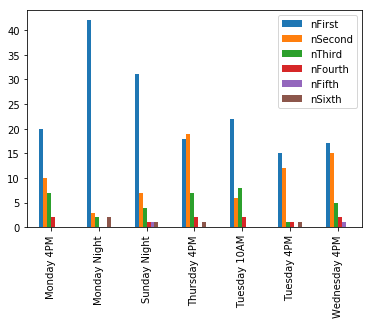

In [14]:
#otherwise will list the values in alphabetical order
gather.loc[:,['nFirst','nSecond','nThird','nFourth','nFifth','nSixth']].plot(kind = 'bar')

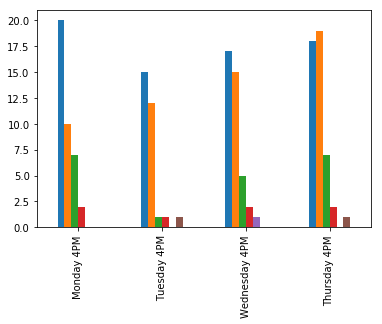

In [15]:
#otherwise will list the values in alphabetical order
gather.loc[only4pm,['nFirst','nSecond','nThird','nFourth','nFifth','nSixth']].plot(kind = 'bar',legend = False)

In [16]:
#another way to do this:
countFirst = {}
for name in openLeagues:
    countFirst[name] = len(regInfo.loc[regInfo[name]==1])

countFirst

{'Sunday Night': 31,
 'Monday 4PM': 20,
 'Monday Night': 42,
 'Tuesday 10AM': 22,
 'Tuesday 4PM': 15,
 'Wednesday 4PM': 17,
 'Thursday 4PM': 18}

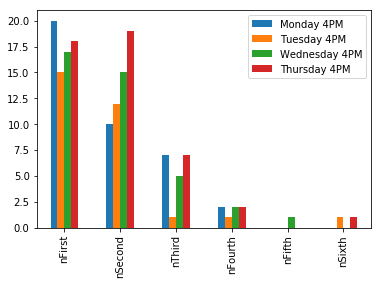

In [17]:
gather.loc[only4pm,['nFirst','nSecond','nThird','nFourth','nFifth','nSixth']].T.plot(kind = 'bar')

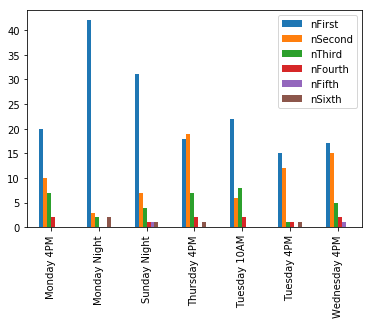

In [18]:
gather.loc[:,['nFirst','nSecond','nThird','nFourth','nFifth','nSixth']].plot(kind = 'bar')